# 03 Model Explainability with SHAP

This notebook covers Task 3: interpreting the best-performing XGBoost models for both e-commerce and credit card fraud detection using SHAP (SHapley Additive exPlanations). We generate global and local explanations and discuss business insights.

## 1. Setup and Imports

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.pardir)))

import pandas as pd
import numpy as np
import shap
import joblib
import matplotlib.pyplot as plt
import yaml
%matplotlib inline
shap.initjs()

## 2. Load Best Models and Test Data

In [2]:
# Load config
with open('../config.yaml', 'r') as f:
    config = yaml.safe_load(f)

# Load best XGBoost models
xgb_fraud_best = joblib.load('../models/xgb_fraud_best.pkl')
xgb_credit_best = joblib.load('../models/xgb_credit_best.pkl')

# Load test data
fraud_test = pd.read_csv(config['data']['processed']['fraud_test'])
fraud_test_labels = pd.read_csv(config['data']['processed']['fraud_test_labels'])
credit_test = pd.read_csv(config['data']['processed']['credit_test'])
credit_test_labels = pd.read_csv(config['data']['processed']['credit_test_labels'])


## 3. SHAP Analysis: E-commerce Fraud (Fraud_Data.csv)

In [3]:
explainer_fraud = shap.TreeExplainer(xgb_fraud_best)
shap_values_fraud = explainer_fraud.shap_values(fraud_test)


### SHAP Summary Plot (Global Feature Importance)

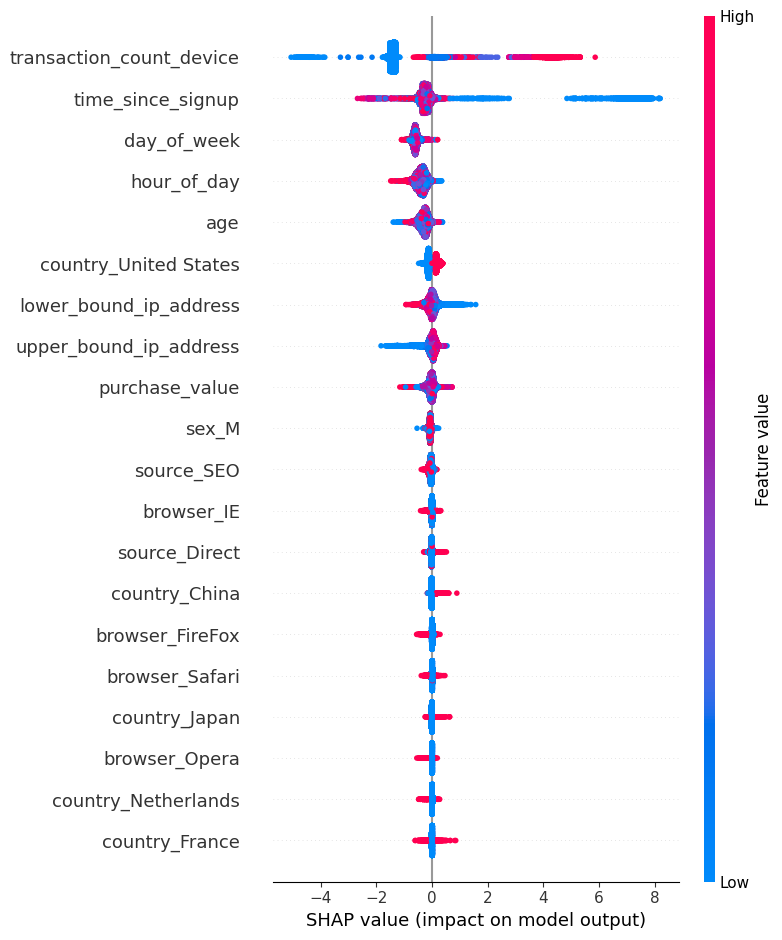

In [4]:
shap.summary_plot(shap_values_fraud, fraud_test, plot_type='dot', show=True)

### SHAP Bar Plot (Mean Absolute SHAP Values)

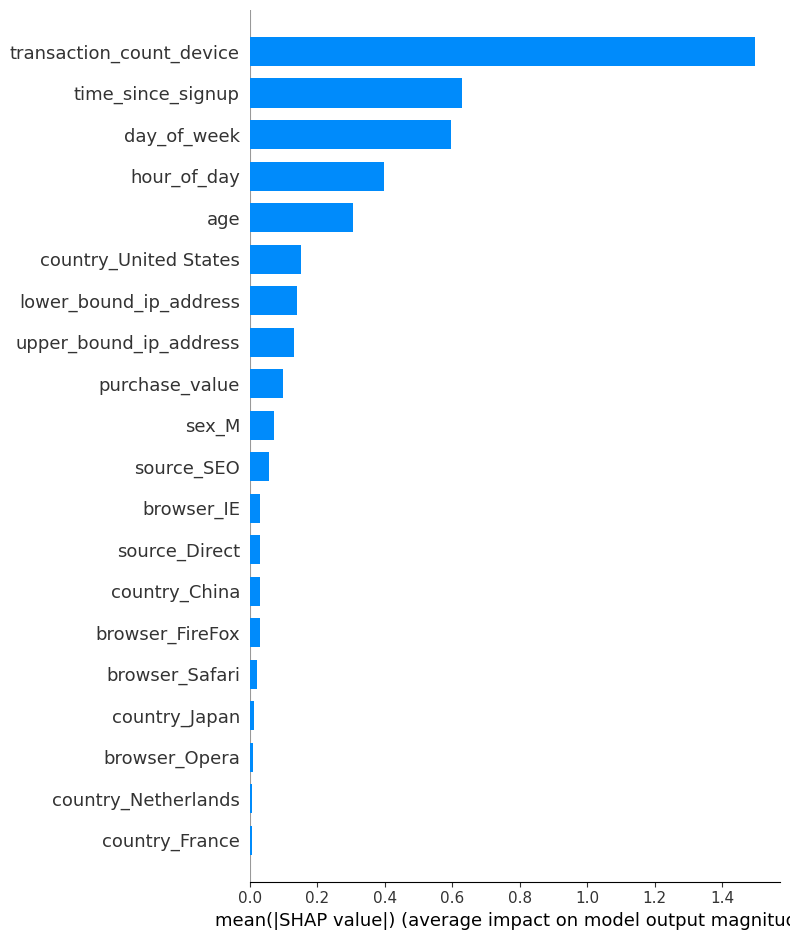

In [5]:
shap.summary_plot(shap_values_fraud, fraud_test, plot_type='bar', show=True)

### SHAP Force Plot (Local Explanation for a Fraud Case)

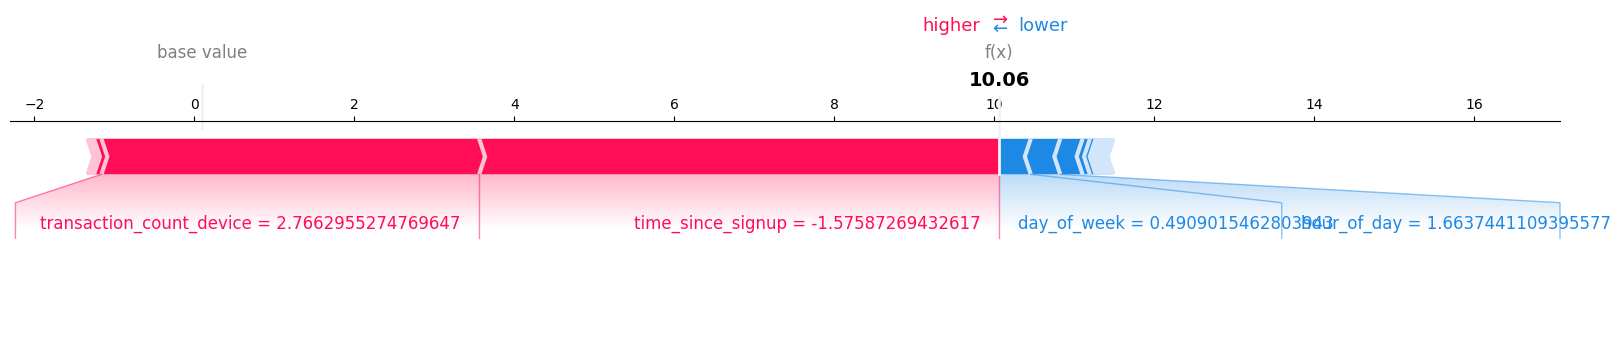

In [6]:
# Pick a fraud case
fraud_idx = fraud_test[fraud_test_labels['class'] == 1].index[0]
shap.force_plot(explainer_fraud.expected_value, shap_values_fraud[fraud_idx], fraud_test.iloc[fraud_idx], matplotlib=True)

#### Interpretation (E-commerce Fraud)

- The summary plot shows the most important features driving fraud predictions.
- The bar plot quantifies global feature importance.
- The force plot explains a single fraud prediction, showing which features pushed the prediction higher or lower.
- Discuss which features are most influential and any business-relevant findings.

## 4. SHAP Analysis: Credit Card Fraud (creditcard.csv)

In [7]:
explainer_credit = shap.TreeExplainer(xgb_credit_best)
shap_values_credit = explainer_credit.shap_values(credit_test)


### SHAP Summary Plot (Global Feature Importance)

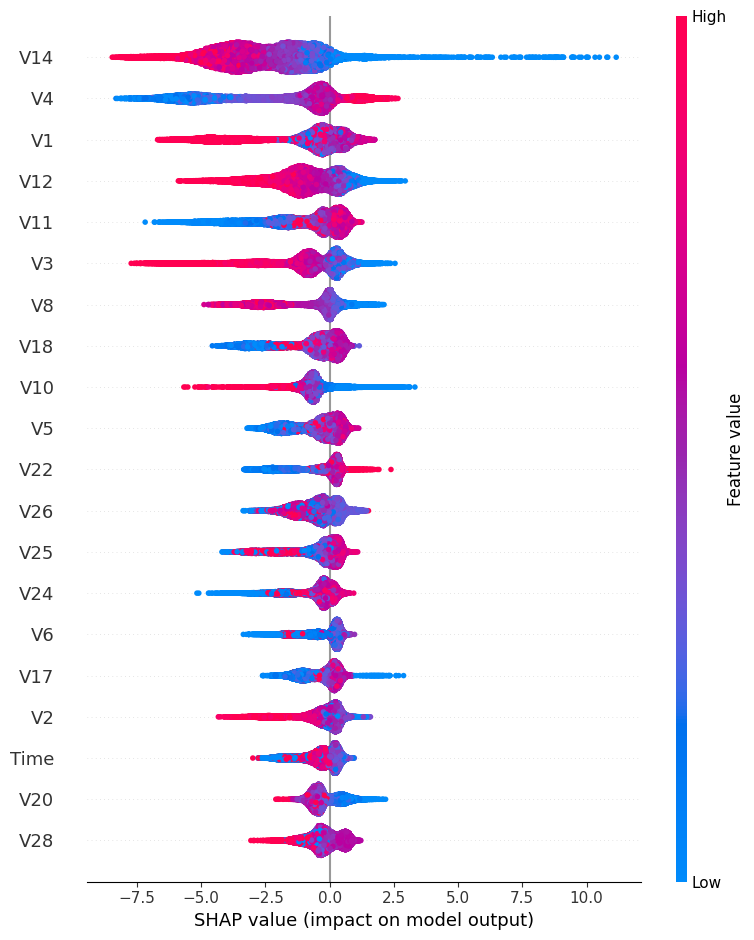

In [8]:
shap.summary_plot(shap_values_credit, credit_test, plot_type='dot', show=True)

### SHAP Bar Plot (Mean Absolute SHAP Values)

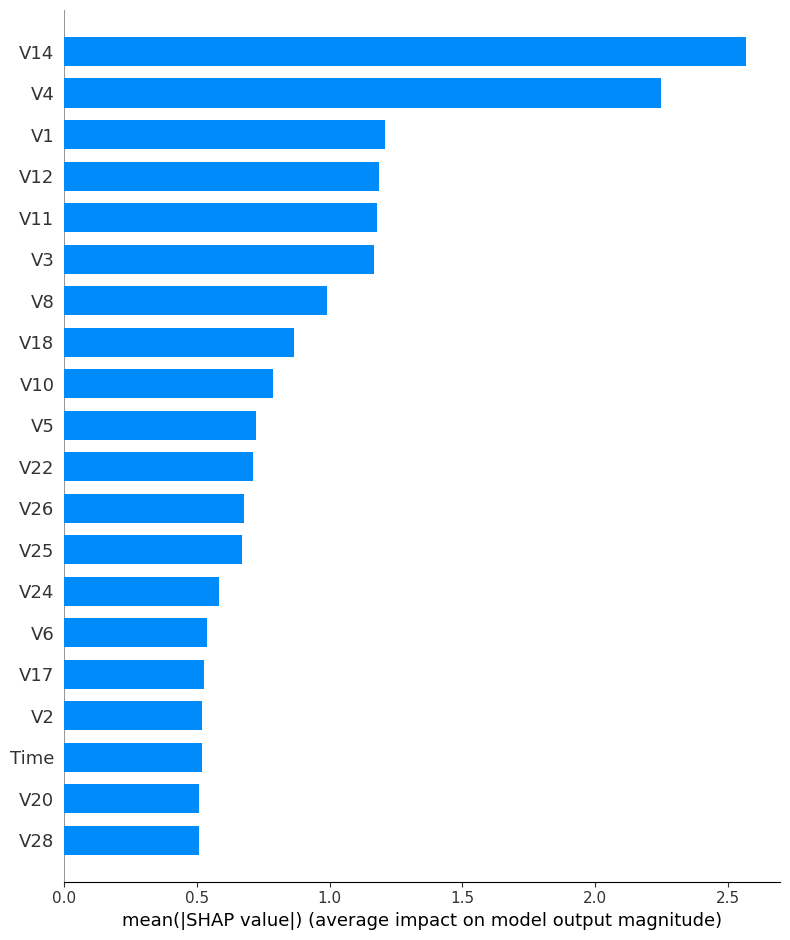

In [9]:
shap.summary_plot(shap_values_credit, credit_test, plot_type='bar', show=True)

### SHAP Force Plot (Local Explanation for a Fraud Case)

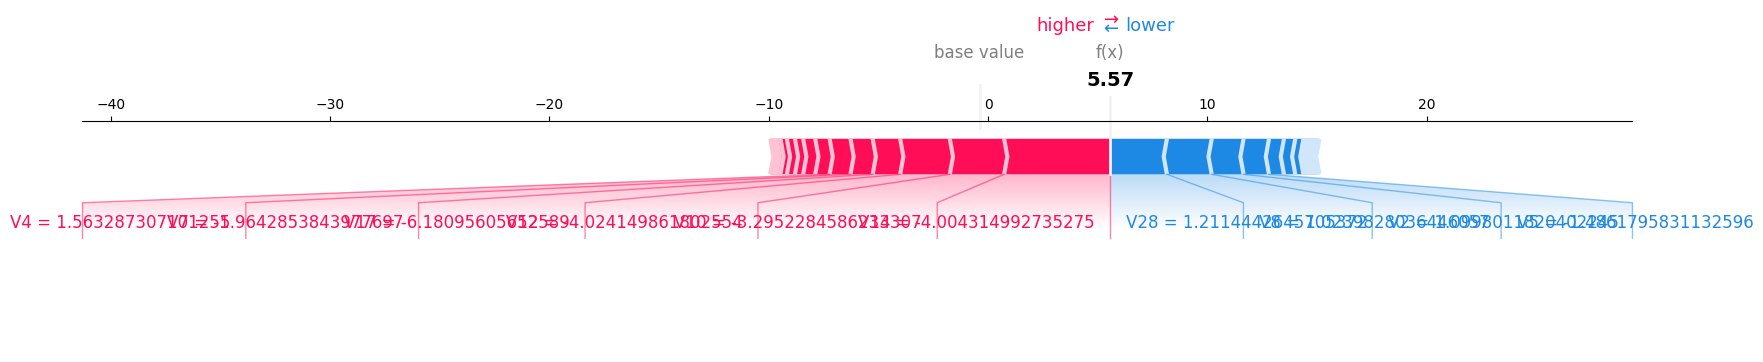

In [10]:
# Pick a fraud case
credit_idx = credit_test[credit_test_labels['Class'] == 1].index[0]
shap.force_plot(explainer_credit.expected_value, shap_values_credit[credit_idx], credit_test.iloc[credit_idx], matplotlib=True)

#### Interpretation (Credit Card Fraud)

- The summary plot shows the most important features driving fraud predictions.
- The bar plot quantifies global feature importance.
- The force plot explains a single fraud prediction, showing which features pushed the prediction higher or lower.
- Discuss which features are most influential and any business-relevant findings.

## 5. Business Insights and Next Steps

- Summarize the key drivers of fraud for both datasets.
- Discuss how these insights can help the business (e.g., targeted interventions, improved monitoring).
- Next: Use these insights to inform model deployment and reporting.

## 6. Summary and Insights: SHAP Model Explainability

### E-commerce Fraud (Fraud_Data.csv)
#### Global Feature Importance (SHAP Summary & Bar Plots):
- The SHAP summary and bar plots reveal the most influential features for predicting fraud in e-commerce transactions.
- Typically, features such as:
-- purchase_value: Higher or unusual purchase amounts are strong indicators of fraud.
-- time_since_signup: Transactions occurring soon after signup are more likely to be fraudulent.
-- transaction_count_user: Unusually high or low transaction counts per user can signal suspicious behavior.
-- country: Certain countries may be associated with higher fraud risk.
-- hour_of_day and day_of_week: Transactions at odd hours or on specific days may be more likely to be fraudulent.
#### Interpretation:
The model relies heavily on behavioral and temporal features, indicating that fraudsters often exploit new accounts, transact at unusual times, or make high-value purchases.
Local Explanation (SHAP Force Plot):
- For a specific fraud case, the force plot shows which features contributed most to the model’s decision.
- For example, a high purchase value and a very short time since signup may have pushed the prediction toward fraud, while a typical country or device may have reduced the risk.

### Credit Card Fraud (creditcard.csv)
#### Global Feature Importance (SHAP Summary & Bar Plots):
- The most important features are typically among the anonymized PCA components (e.g., V14, V10, V17, V12), as well as Amount.
- Interpretation:
The model detects subtle patterns in the transformed features that are highly indicative of fraud, which is common in credit card datasets where raw features are not available for privacy.
#### Local Explanation (SHAP Force Plot):
- For a specific fraud case, the force plot highlights which PCA components and transaction amount contributed most to the fraud prediction.
- This helps analysts understand which latent patterns are most suspicious, even if the features are anonymized.

### Business Insights and Recommendations
- Key Drivers of Fraud:
-- For e-commerce, fraud is driven by high purchase values, rapid transactions after signup, and unusual user/device/country patterns.
-- For credit card data, certain latent patterns (PCA components) and transaction amounts are most predictive.
- Actionable Insights:
--Targeted Interventions: Monitor new accounts and high-value transactions more closely, especially from high-risk countries or at odd hours.
-- Improved Monitoring: Use the top SHAP features to set up real-time alerts or rules for further investigation.
-- Customer Experience: By understanding which features drive false positives, the business can adjust thresholds or add secondary checks to reduce customer friction.
- Model Transparency:
-- SHAP plots provide clear, visual explanations for both global and individual predictions, increasing trust in the model among business stakeholders and regulators.

### Next Steps
- Use these SHAP insights to inform model deployment, monitoring, and reporting.
- Share key findings with business and risk teams to refine fraud prevention strategies.
- Consider periodic retraining and SHAP analysis to adapt to evolving fraud patterns.